<a href="https://colab.research.google.com/github/abinav102/ML-Fundamentals/blob/main/NY_aIrBnBipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [4]:
airBNB = pd.read_csv('AB_NYC_2019.csv')
airBNB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airBNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airBNB.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
airBNB.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


TO DROP COLUMNS


In [8]:
airBNB = airBNB.drop(columns = ['last_review','reviews_per_month'])

TO REMOVE ROWS WITH PARTICULAR INDICES

In [9]:
indexesToDrop = airBNB[airBNB['price']==0].index
airBNB.drop(indexesToDrop,inplace = True)

In [10]:
airBNB.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


TO REMOVE ROWS THAT CONTAIN ONE OR MORE NULL VALUES

In [11]:
airBNB.dropna(inplace = True)
airBNB.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


TO FIND THE NUMBER OF LISTINGS OF Each
 NEIGHBOURHOOD GROUP

In [12]:
groupByNeighbourhoodSize = airBNB.groupby('neighbourhood_group').size()
groupByNeighbourhoodSize

,0
neighbourhood_group,
Bronx,1088
Brooklyn,20080
Manhattan,21642
Queens,5664
Staten Island,373


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of Listings')

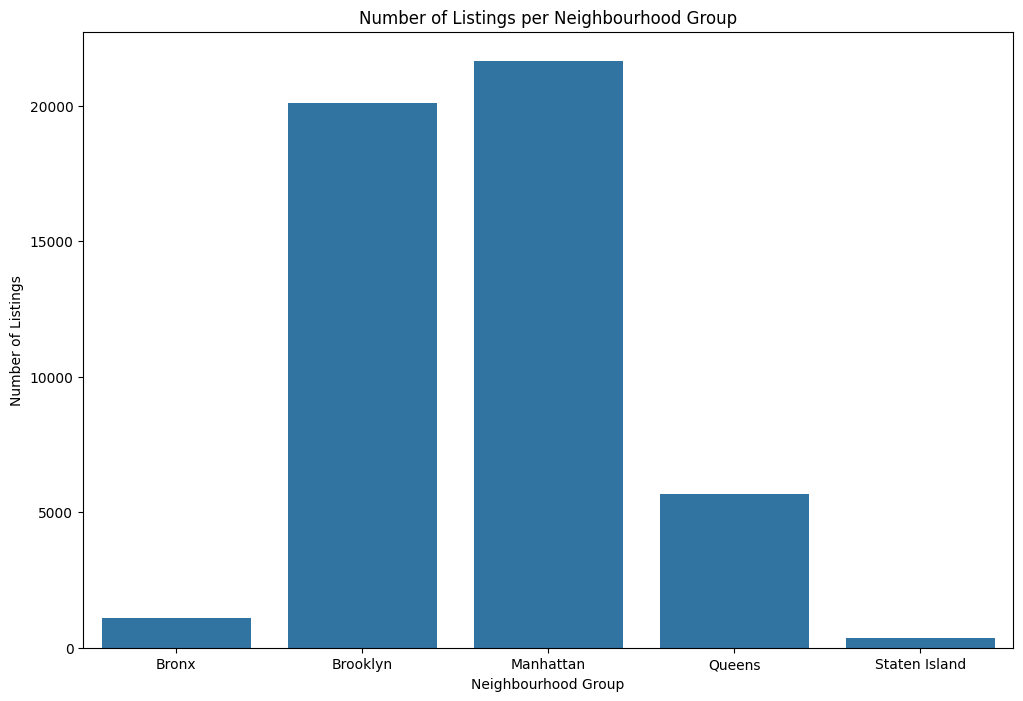

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=groupByNeighbourhoodSize.index,y=groupByNeighbourhoodSize.values)
plt.title("Number of Listings per Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")

<Axes: xlabel='neighbourhood_group', ylabel='price'>

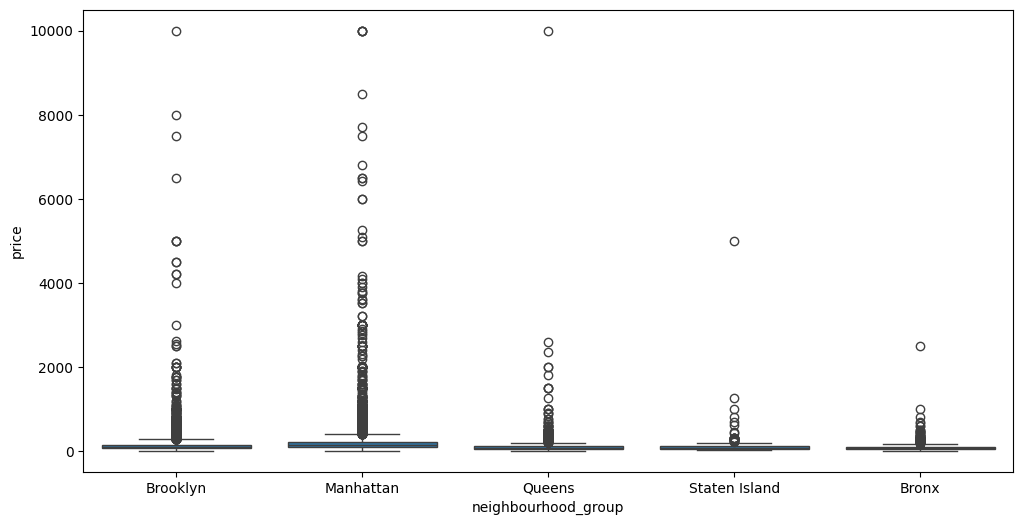

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood_group',y='price',data = airBNB)


In [18]:
mean_price = airBNB.groupby('neighbourhood_group')['price'].mean()
print(mean_price)

neighbourhood_group
Bronx             87.549632
Brooklyn         124.466285
Manhattan        196.906571
Queens            99.536017
Staten Island    114.812332
Name: price, dtype: float64
